In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e19b6e3de5ce467c9b98c76b4fddde9e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8jYXT5yVJV1gLIJniaspwMq0dt0-OacdHpBf82jZjeuL',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e19b6e3de5ce467c9b98c76b4fddde9e.get_object(Bucket='heartdisease-donotdelete-pr-mskmxrgphvthxw',Key='heart.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.sort_values(by = 'age',inplace = True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


#### Attributes Information:
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
transpose = df.iloc[:,[0,3,4,7]] 
from sklearn.preprocessing import Normalizer
nm = Normalizer()
transpose = nm.fit_transform(transpose)
transpose = pd.DataFrame(transpose)
transpose.rename(columns = {0:'age',1:'trestbps',2:'chol',3:'thalach'},inplace=True)
ndf = df.iloc[:,:]
ndf['age']=transpose['age'].round(3)
ndf['trestbps'] = transpose['trestbps'].round(3)
ndf['chol'] = transpose['chol'].round(3)
ndf['thalach'] = transpose ['thalach'].round(3)
ndf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.092,1,1,0.411,0.645,0,0,0.638,0,0.0,2,0,2,1
1,0.121,1,3,0.421,0.650,0,0,0.621,0,0.0,2,0,2,1
2,0.110,0,1,0.381,0.678,0,1,0.620,0,0.7,2,0,2,1
3,0.101,1,0,0.362,0.811,0,0,0.449,1,0.0,2,0,3,0
4,0.119,0,0,0.468,0.621,0,1,0.617,0,1.4,2,0,2,1


In [7]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e19b6e3de5ce467c9b98c76b4fddde9e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8jYXT5yVJV1gLIJniaspwMq0dt0-OacdHpBf82jZjeuL',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e19b6e3de5ce467c9b98c76b4fddde9e.get_object(Bucket='heartdisease-donotdelete-pr-mskmxrgphvthxw',Key='heart.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.sort_values(by = 'age',inplace = True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


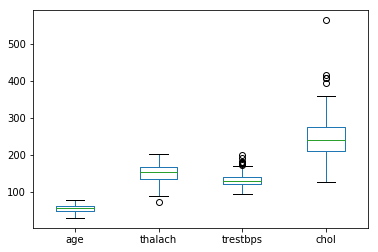

In [8]:
df[['age','thalach','trestbps','chol']].plot(kind='box',grid = False,layout=None)

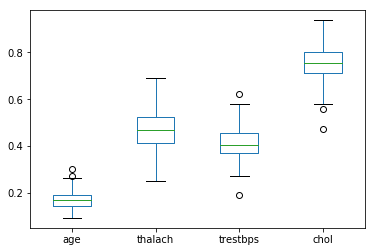

In [9]:
ndf[['age','thalach','trestbps','chol']].plot(kind='box',grid = False,layout=None)

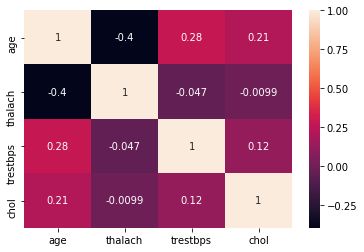

In [10]:
sns.heatmap(df[['age','thalach','trestbps','chol']].corr(),annot = True)

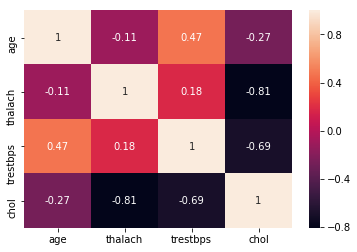

In [11]:
sns.heatmap(ndf[['age','thalach','trestbps','chol']].corr(),annot = True)

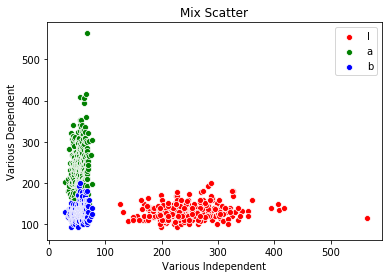

In [12]:
sns.scatterplot(x = 'chol', y = 'trestbps', data = df, color = 'r',legend = 'full')
sns.scatterplot(x = 'age', y = 'chol', data = df,color = 'g',legend = 'full')
sns.scatterplot(x = 'age', y = 'trestbps', data = df,color = 'b',legend = 'full')
plt.xlabel('Various Independent')
plt.ylabel('Various Dependent')
plt.title('Mix Scatter')
plt.legend('labels',)

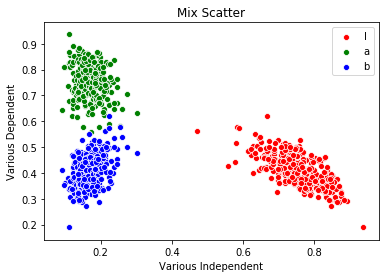

In [13]:
sns.scatterplot(x = 'chol', y = 'trestbps', data = ndf, color = 'r',legend = 'full')
sns.scatterplot(x = 'age', y = 'chol', data = ndf,color = 'g',legend = 'full')
sns.scatterplot(x = 'age', y = 'trestbps', data = ndf,color = 'b',legend = 'full')
plt.xlabel('Various Independent')
plt.ylabel('Various Dependent')
plt.title('Mix Scatter')
plt.legend('labels',)

Text(0.5, 1.0, 'Mix Distributions')

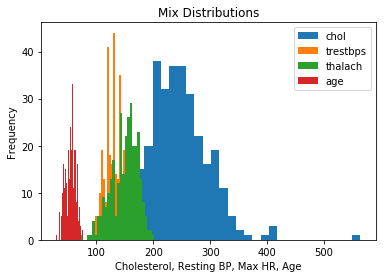

In [14]:
df['chol'].plot(kind = 'hist',bins = 30, legend = True)
df['trestbps'].plot(kind = 'hist',bins = 30,legend = True)
df['thalach'].plot(kind = 'hist',bins = 30,legend = True)
df['age'].plot(kind = 'hist',bins = 30,legend = True)
plt.xlabel('Cholesterol, Resting BP, Max HR, Age')
plt.title('Mix Distributions')

Text(0.5, 1.0, 'Mix Distributions')

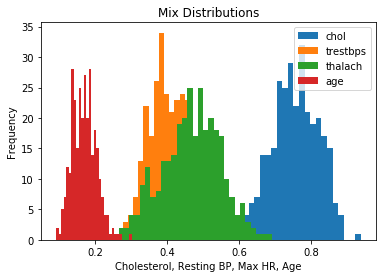

In [15]:
ndf['chol'].plot(kind = 'hist',bins = 30, legend = True)
ndf['trestbps'].plot(kind = 'hist',bins = 30,legend = True)
ndf['thalach'].plot(kind = 'hist',bins = 30,legend = True)
ndf['age'].plot(kind = 'hist',bins = 30,legend = True)
plt.xlabel('Cholesterol, Resting BP, Max HR, Age')
plt.title('Mix Distributions')

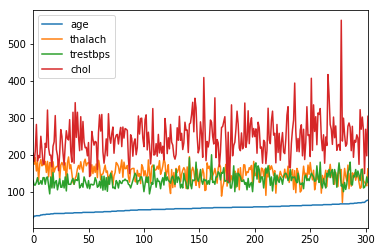

In [16]:
df[['age','thalach','trestbps','chol']].plot(legend = True)

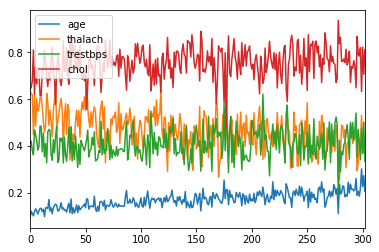

In [17]:
ndf[['age','thalach','trestbps','chol']].plot(legend = True)

In [20]:
ndf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.092,1,1,0.411,0.645,0,0,0.638,0,0.0,2,0,2,1
1,0.121,1,3,0.421,0.650,0,0,0.621,0,0.0,2,0,2,1
2,0.110,0,1,0.381,0.678,0,1,0.620,0,0.7,2,0,2,1
3,0.101,1,0,0.362,0.811,0,0,0.449,1,0.0,2,0,3,0
4,0.119,0,0,0.468,0.621,0,1,0.617,0,1.4,2,0,2,1


### Clustering the data

In [79]:
xk = ndf.iloc[:,[0,3,4,7]].values

array([0, 0, 0, 1, 3, 4, 0, 0, 0, 3, 3, 0, 0, 1, 1, 0, 3, 4, 0, 1, 1, 0,
       0, 3, 4, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 2, 4, 2, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 4, 0, 3, 0, 1, 1, 2, 0, 3, 0,
       4, 0, 2, 1, 4, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 3,
       1, 1, 3, 0, 4, 4, 0, 2, 1, 2, 1, 0, 1, 1, 2, 4, 0, 1, 4, 0, 1, 3,
       3, 0, 3, 1, 0, 1, 0, 0, 3, 1, 1, 3, 0, 4, 2, 0, 4, 3, 4, 3, 1, 0,
       1, 1, 1, 0, 0, 1, 2, 1, 4, 4, 2, 1, 1, 1, 2, 2, 1, 4, 4, 4, 1, 0,
       2, 2, 4, 0, 0, 0, 1, 4, 1, 4, 2, 3, 4, 4, 3, 0, 2, 2, 2, 1, 0, 3,
       1, 3, 4, 2, 4, 4, 1, 2, 2, 1, 4, 3, 1, 4, 0, 1, 4, 1, 2, 0, 1, 1,
       1, 0, 4, 4, 3, 4, 4, 4, 0, 3, 1, 0, 4, 3, 2, 0, 0, 1, 1, 1, 4, 4,
       1, 4, 1, 3, 4, 1, 4, 3, 4, 2, 1, 3, 3, 4, 1, 2, 2, 2, 0, 4, 4, 2,
       2, 4, 1, 3, 4, 2, 0, 1, 3, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 0, 4, 3,
       1, 4, 2, 2, 1, 4, 4, 1, 4, 1, 4, 4, 3, 4, 2, 2, 2, 1, 1, 4, 4, 2,
       4, 4, 1, 3, 4, 4, 4, 4, 3, 2, 4, 4, 1, 3, 2,

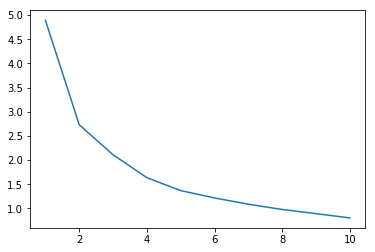

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(xk)
    wcss.append(kmeans.inertia_)
#check by plotting
plt.plot(range(1,11),wcss)
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(xk)
y_kmeans

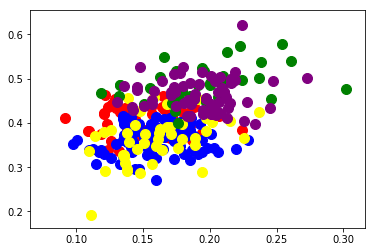

In [81]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s=100,  c='red', label = 'Cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=100,  c='blue', label = 'Cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s=100,  c='yellow', label = 'Cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1], s=100,  c='green', label = 'Cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1], s=100,  c='purple', label = 'Cluster5')

In [82]:
k_ndf = pd.concat([pd.DataFrame(y_kmeans)[0],ndf],axis = 1)
k_ndf.rename({0:'cluster'},axis =1,inplace = True)
k_ndf

,cluster,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0.092,1,1,0.411,0.645,0,0,0.638,0,0.0,2,0,2,1
1,0,0.121,1,3,0.421,0.650,0,0,0.621,0,0.0,2,0,2,1
2,0,0.110,0,1,0.381,0.678,0,1,0.620,0,0.7,2,0,2,1
3,1,0.101,1,0,0.362,0.811,0,0,0.449,1,0.0,2,0,3,0
4,3,0.119,0,0,0.468,0.621,0,1,0.617,0,1.4,2,0,2,1
5,4,0.131,1,0,0.448,0.739,0,1,0.485,1,1.6,1,0,3,0
6,0,0.121,1,1,0.423,0.665,0,1,0.603,0,0.0,2,0,2,1
7,0,0.109,1,2,0.382,0.735,0,1,0.550,0,3.5,0,0,2,1
8,0,0.123,0,2,0.398,0.713,0,1,0.564,0,0.0,2,0,2,1
9,3,0.133,1,2,0.485,0.615,0,1,0.608,0,0.0,2,4,2,1


### Clustering and Classification

In [100]:
x = k_ndf.iloc[:,:14].values
y = k_ndf.iloc[:,14].values

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2)

In [102]:
#Logistic Regression 
from sklearn.linear_model  import LogisticRegression
logicmodel = LogisticRegression()
logicmodel.fit(x_train, y_train)
#Test Data
y_pred = logicmodel.predict(x_test)
y_pred

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_test, y_pred)

array([[15,  6],
       [ 3, 37]])

In [104]:
accuracy_score(y_test, y_pred)

0.8524590163934426